In [24]:
import pyforest 
import sidetable
import statsmodels.formula.api as smf #model Building

C:\Users\Sanchi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
Computer_Data=pd.read_csv("Computer_Data.csv")
Computer_Data.head()

<IPython.core.display.Javascript object>

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


In [4]:
Computer_Data=Computer_Data.drop(columns="Unnamed: 0")

In [9]:
Computer_Data.stb.missing()

,Missing,Total,Percent
price,0,6259,0.0
speed,0,6259,0.0
hd,0,6259,0.0
ram,0,6259,0.0
screen,0,6259,0.0
cd,0,6259,0.0
multi,0,6259,0.0
premium,0,6259,0.0
ads,0,6259,0.0
trend,0,6259,0.0


In [14]:
Computer_Data.stb.freq(["trend"])

,trend,Count,Percent,Cumulative Count,Cumulative Percent
0,17,339,0.054162,339,0.054162
1,16,307,0.049049,646,0.103211
2,8,298,0.047611,944,0.150823
3,14,292,0.046653,1236,0.197476
4,10,283,0.045215,1519,0.242691
5,12,275,0.043937,1794,0.286627
6,18,273,0.043617,2067,0.330244
7,15,267,0.042659,2334,0.372903
8,11,259,0.041380,2593,0.414283
9,7,249,0.039783,2842,0.454066


In [15]:
Computer_Data

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,no,no,yes,39,35
6255,2223,66,850,16,15,yes,yes,yes,39,35
6256,2654,100,1200,24,15,yes,no,yes,39,35
6257,2195,100,850,16,15,yes,no,yes,39,35


In [16]:
Computer_Data.stb.freq(['price', 'hd', 'ram'])

,price,hd,ram,Count,Percent,Cumulative Count,Cumulative Percent
0,2090,214,4,26,0.004154,26,0.004154
1,1890,214,4,23,0.003675,49,0.007829
2,2890,528,16,22,0.003515,71,0.011344
3,1944,214,4,22,0.003515,93,0.014859
4,2290,214,4,21,0.003355,114,0.018214
...,...,...,...,...,...,...,...
2430,1119,125,2,1,0.000160,6255,0.999361
2431,1088,250,2,1,0.000160,6256,0.999521
2432,999,250,2,1,0.000160,6257,0.999680
2433,999,125,2,1,0.000160,6258,0.999840


In [17]:
Computer_Data.describe(include="all")

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259,6259,6259,6259.000000,6259.000000
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,no,no,yes,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3351,5386,5647,NaN,NaN
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,NaN,NaN,NaN,221.301007,15.926985
std,580.803956,21.157735,258.548445,5.631099,0.905115,NaN,NaN,NaN,74.835284,7.873984
min,949.000000,25.000000,80.000000,2.000000,14.000000,NaN,NaN,NaN,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,NaN,NaN,NaN,162.500000,10.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,NaN,NaN,NaN,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,NaN,NaN,NaN,275.000000,21.500000


In [18]:
Computer_Data.stb.subtotal()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499.0,25.0,80.0,4.0,14.0,no,no,yes,94.0,1.0
1,1795.0,33.0,85.0,2.0,14.0,no,no,yes,94.0,1.0
2,1595.0,25.0,170.0,4.0,15.0,no,no,yes,94.0,1.0
3,1849.0,25.0,170.0,8.0,14.0,no,no,no,94.0,1.0
4,3295.0,33.0,340.0,16.0,14.0,no,no,yes,94.0,1.0
...,...,...,...,...,...,...,...,...,...,...
6255,2223.0,66.0,850.0,16.0,15.0,yes,yes,yes,39.0,35.0
6256,2654.0,100.0,1200.0,24.0,15.0,yes,no,yes,39.0,35.0
6257,2195.0,100.0,850.0,16.0,15.0,yes,no,yes,39.0,35.0
6258,2490.0,100.0,850.0,16.0,17.0,yes,no,yes,39.0,35.0


In [19]:
Computer_Data.cd=pd.get_dummies(Computer_Data.cd)
Computer_Data.multi=pd.get_dummies(Computer_Data.multi)
Computer_Data.premium=pd.get_dummies(Computer_Data.premium)
Computer_Data.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,1,1,0,94,1
1,1795,33,85,2,14,1,1,0,94,1
2,1595,25,170,4,15,1,1,0,94,1
3,1849,25,170,8,14,1,1,1,94,1
4,3295,33,340,16,14,1,1,0,94,1


In [20]:
x=Computer_Data.drop(columns="price")
y=Computer_Data.iloc[::,0:1:]

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=3)

<IPython.core.display.Javascript object>

In [22]:
ols_data=pd.concat([xtrain,ytrain],axis=1)
ols_data.head()

<IPython.core.display.Javascript object>

,speed,hd,ram,screen,cd,multi,premium,ads,trend,price
5996,66,365,8,15,1,1,0,75,30,1299
5689,66,540,8,17,0,0,0,163,27,2159
564,50,212,8,15,1,1,0,176,6,2295
5072,33,424,4,17,1,1,0,182,24,1779
1959,50,424,4,14,0,0,0,259,11,2190


In [25]:
model_transform=smf.ols("np.log(price)~trend+speed+hd+ram+screen+cd+multi+premium+ads",data=ols_data).fit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
np.exp(model_transform.predict(xtest))


<IPython.core.display.Javascript object>

1907    2038.463975
1111    1864.484149
4370    1558.810279
1041    1905.957589
111     2027.679737
           ...     
3101    2595.398657
741     2059.800200
4379    2118.085953
1394    3622.717687
2434    1625.310993
Length: 1252, dtype: float64

In [30]:
ytest

,price
1907,1795
1111,1894
4370,1399
1041,1890
111,2095
...,...
3101,2690
741,2144
4379,2049
1394,3515


In [31]:
model_transform.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     1999.
Date:                Thu, 02 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:51:06   Log-Likelihood:                 3499.7
No. Observations:                5007   AIC:                            -6979.
Df Residuals:                    4997   BIC:                            -6914.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6992      0.030    226.963      0.000       6.641       6.757
trend         -0.0237      0.000    -77.012      0.000      -0.024      -0.023
speed          0.0042   9.07e-05     46.752      0.000       0.004       0.004
hd             0.0003   1.33e-05     25.532      0.000       0.000       0.000
ram            0.0209      0.001     40.472      0.000       0.020       0.022
screen         0.0543      0.002     27.433      0.000       0.050       0.058
cd            -0.0501      0.005    -10.825      0.000      -0.059      -0.041
multi         -0.0424      0.006     -7.636      0.000      -0.053      -0.032
premium        0.2225      0.006     36.490      0.000       0.211       0.234
ads            0.0003    2.5e-05     11.351      0.000       0.000       0.000
==============================================================================
Omnibus:                      110.891   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.642
Skew:                          -0.044   Prob(JB):                     7.53e-54
Kurtosis:                       4.079   Cond. No.                     9.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Multicolinearity

<IPython.core.display.Javascript object>

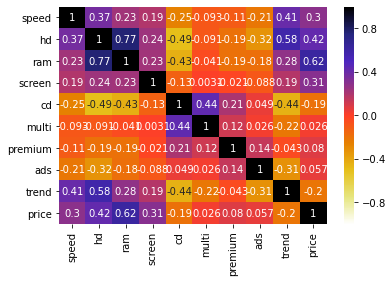

In [32]:
sns.heatmap(ols_data.corr(),vmin=-1,vmax=1,cmap ='CMRmap_r',annot=True)

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
#VIF starts at 1 and has no upper limit
#VIF = 1, no correlation between the independent variable and the other variables
#VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [34]:
X = ols_data.iloc[:,:-1]
calc_vif(X)

<IPython.core.display.Javascript object>

,variables,VIF
0,speed,8.966151
1,hd,14.703609
2,ram,9.218644
3,screen,39.409434
4,cd,3.865784
5,multi,9.078476
6,premium,1.212548
7,ads,10.929854
8,trend,10.204765


In [41]:
ols_data_vif=ols_data.drop(columns=["screen"])
ols_data_vif

,speed,hd,ram,cd,multi,premium,ads,trend,price
5996,66,365,8,1,1,0,75,30,1299
5689,66,540,8,0,0,0,163,27,2159
564,50,212,8,1,1,0,176,6,2295
5072,33,424,4,1,1,0,182,24,1779
1959,50,424,4,0,0,0,259,11,2190
...,...,...,...,...,...,...,...,...,...
968,66,214,4,1,1,0,298,8,2195
1667,33,212,4,1,1,1,283,10,2049
3321,25,528,16,0,1,0,307,16,2290
1688,33,1370,4,1,1,0,283,10,2875


In [43]:
model_transform1=smf.ols("np.log(price)~trend+hd+speed+ram+cd+multi+premium+ads",data=ols_data_vif).fit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
model_transform1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     1873.
Date:                Thu, 02 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:56:14   Log-Likelihood:                 3148.5
No. Observations:                5007   AIC:                            -6279.
Df Residuals:                    4998   BIC:                            -6220.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4519      0.012    638.525      0.000       7.429       7.475
trend         -0.0232      0.000    -70.394      0.000      -0.024      -0.023
hd             0.0003   1.42e-05     24.260      0.000       0.000       0.000
speed          0.0045   9.67e-05     46.608      0.000       0.004       0.005
ram            0.0222      0.001     40.422      0.000       0.021       0.023
cd            -0.0505      0.005    -10.182      0.000      -0.060      -0.041
multi         -0.0368      0.006     -6.188      0.000      -0.048      -0.025
premium        0.2272      0.007     34.756      0.000       0.214       0.240
ads            0.0003   2.68e-05     10.519      0.000       0.000       0.000
==============================================================================
Omnibus:                      122.857   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.913
Skew:                           0.064   Prob(JB):                     1.00e-61
Kurtosis:                       4.153   Cond. No.                     3.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
X = ols_data_vif.iloc[:,:-1]
calc_vif(X)

<IPython.core.display.Javascript object>

,variables,VIF
0,speed,7.909295
1,hd,14.679376
2,ram,8.873551
3,cd,3.384833
4,multi,8.350797
5,premium,1.209004
6,ads,5.937046
7,trend,8.543562


In [46]:
ols_data_vif2=ols_data_vif.drop(columns="hd")
ols_data_vif2

,speed,ram,cd,multi,premium,ads,trend,price
5996,66,8,1,1,0,75,30,1299
5689,66,8,0,0,0,163,27,2159
564,50,8,1,1,0,176,6,2295
5072,33,4,1,1,0,182,24,1779
1959,50,4,0,0,0,259,11,2190
...,...,...,...,...,...,...,...,...
968,66,4,1,1,0,298,8,2195
1667,33,4,1,1,1,283,10,2049
3321,25,16,0,1,0,307,16,2290
1688,33,4,1,1,0,283,10,2875


In [47]:
model_ols_vif2=smf.ols("np.log(price)~trend+speed+ram+cd+multi+premium",data=ols_data_vif2).fit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
model_ols_vif2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     2124.
Date:                Thu, 02 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:57:33   Log-Likelihood:                 2849.6
No. Observations:                5007   AIC:                            -5685.
Df Residuals:                    5000   BIC:                            -5640.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5176      0.009    858.230      0.000       7.500       7.535
trend         -0.0199      0.000    -67.653      0.000      -0.020      -0.019
speed          0.0047      0.000     46.106      0.000       0.004       0.005
ram            0.0317      0.000     79.891      0.000       0.031       0.032
cd            -0.0705      0.005    -13.672      0.000      -0.081      -0.060
multi         -0.0227      0.006     -3.606      0.000      -0.035      -0.010
premium        0.2244      0.007     32.719      0.000       0.211       0.238
==============================================================================
Omnibus:                      131.541   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.889
Skew:                           0.114   Prob(JB):                     2.51e-64
Kurtosis:                       4.163   Cond. No.                         289.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
resid=model_ols_vif2.resid

<IPython.core.display.Javascript object>

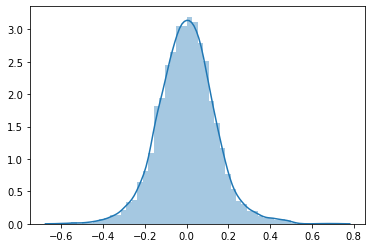

In [53]:
sns.distplot(resid)

In [57]:
from statsmodels.stats.diagnostic import het_breuschpagan # homo hetro testing
a,b,c,d=het_breuschpagan(resid,xtrain)
print("LM Statistic={}," "LM-Test p-value={}," "F-Statistic={}," "F-Test p-value={}".format(a,b,c,d))
# Null Rejected data is homo bcz p is less than 0.05

LM Statistic=1704.9632817255358,LM-Test p-value=0.0,F-Statistic=286.73907143781224,F-Test p-value=0.0


In [60]:
from statsmodels.stats.diagnostic import het_white
white_test = het_white(resid,  model_ols_vif2.model.exog)
white_test
#homo

(641.6880568476829,
 8.206786202726544e-121,
 31.847234355878477,
 6.954419940679812e-130)

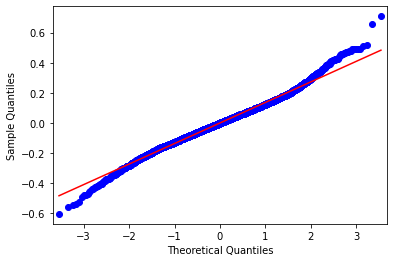

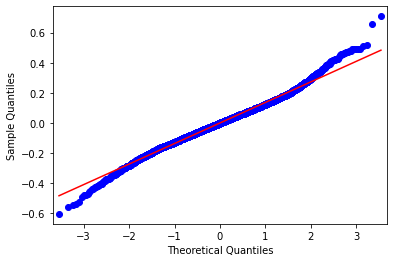

In [61]:
import statsmodels.api as sm 
sm.qqplot(resid, line='r')

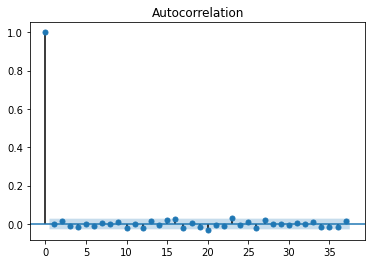

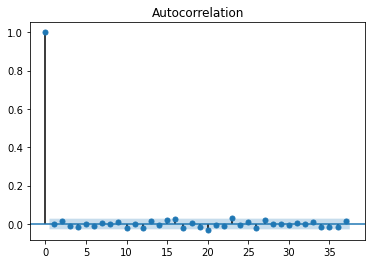

In [62]:
import statsmodels.graphics.tsaplots
statsmodels.graphics.tsaplots.plot_acf(resid)

In [63]:
statsmodels.stats.stattools.durbin_watson(resid)

2.0042551028027074

In [64]:
resid.mean()
#almost zero 

4.211601220668714e-14

In [65]:
final_model =smf.ols("np.log(price)~trend+speed+ram+cd+multi+premium",data=Computer_Data).fit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     2663.
Date:                Thu, 02 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:11:24   Log-Likelihood:                 3568.7
No. Observations:                6259   AIC:                            -7123.
Df Residuals:                    6252   BIC:                            -7076.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5201      0.008    956.256      0.000       7.505       7.536
trend         -0.0198      0.000    -75.327      0.000      -0.020      -0.019
speed          0.0047   9.07e-05     51.687      0.000       0.005       0.005
ram            0.0316      0.000     89.188      0.000       0.031       0.032
cd            -0.0697      0.005    -15.057      0.000      -0.079      -0.061
multi         -0.0280      0.006     -4.955      0.000      -0.039      -0.017
premium        0.2285      0.006     37.749      0.000       0.217       0.240
==============================================================================
Omnibus:                      162.055   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.226
Skew:                           0.129   Prob(JB):                     8.90e-77
Kurtosis:                       4.130   Cond. No.                         290.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
np.exp(final_model.predict())

<IPython.core.display.Javascript object>

array([2092.85215526, 2039.81703995, 2092.85215526, ..., 3062.80112582,
       2378.73137037, 2378.73137037])

In [76]:
Computer_Data

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,1,1,0,94,1
1,1795,33,85,2,14,1,1,0,94,1
2,1595,25,170,4,15,1,1,0,94,1
3,1849,25,170,8,14,1,1,1,94,1
4,3295,33,340,16,14,1,1,0,94,1
...,...,...,...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,1,1,0,39,35
6255,2223,66,850,16,15,0,0,0,39,35
6256,2654,100,1200,24,15,0,1,0,39,35
6257,2195,100,850,16,15,0,1,0,39,35
